In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.spatial import distance
from sklearn.linear_model import LinearRegression
import sklearn 
import scipy
from tqdm import tqdm
from sklearn.neighbors import NearestNeighbors

In [140]:
os.chdir("/content/drive/MyDrive/Winter_Research")

In [124]:
KS = (32, 6279, 11, 3) 
MT = (29, 6554, 11, 3) 
TX = (34, 6524, 11, 3) 
OH =(19, 5712, 11, 3)
CA = (43, 6569, 11, 3) 

In [125]:
# New Cloud Data
# CA -- 43 images, 72264 pixels, save shape (43, 6569, 11, 3)
# KS -- 32 images, 69071 pixels, save shape (32, 6279, 11, 3)
# MT -- 23 images, 72099 pixels, save shape (23, 6554, 11, 3)
# TX -- 32 images, 71764 pixels, save shape (32, 6524, 11, 3)
# OH -- 12 images, 62827 pixels, save shape (12, 5711, 11, 3)

In [141]:
os.mkdir("Rois/Roi_5/greedy_a")

In [161]:
prefix = "/content/drive/MyDrive/Winter_Research/Rois/Roi_1/sent_cloud_90p_raw/"
save_path = "/content/drive/MyDrive/Winter_Research/Rois/Roi_1/greedy_a/"

In [162]:
imgs = os.listdir(prefix)

In [170]:
reshape = [np.loadtxt(prefix + fp) for fp in imgs] 

In [171]:
reshape[0][0].dtype = np.int

In [178]:
reshape[0].shape

(70402, 5)

In [173]:
print(len(reshape), len(imgs))

80 80


In [174]:
road_temp = np.loadtxt("Rois/Roi_1/new_sort_template_less_1.csv").reshape(-1, 7, 2)

In [179]:
new_sorted_img = road_temp

In [260]:
reshape[0].shape

(70402, 5)

In [192]:
np.max(reshape[0][:, 4])

724515.0

In [298]:
unq = []
valid = 0
for img in reshape:
  lat_lon_bulk = img[:, 3:5]
  temp = []
  for val in lat_lon_bulk.reshape(-1, 2):
    unq.append(val[0]*100000000 + val[1])
    temp.append(val[0]*100000000 + val[1])
  if len(set(temp)) == 72264:
    valid += 1
print(len(set(unq)))
print(valid)

337503
40


In [293]:
# for pic_num in range(reshape.shape[0]):
# 
insert_pixs_img = ""
coord_lookup = {}
for img, name in zip(reshape, imgs):
  # coord_lookup = {}
  pic = img
  for c in range(pic.shape[0]):
    if pic[c][4] not in coord_lookup:
      # print(pic[c])
      coord_lookup[int(pic[c][4])] = {}
    coord_lookup[int(pic[c][4])][int(pic[c][3])] = pic[c][:3]  
  insert_pixs_img = np.zeros((new_sorted_img.shape[0], new_sorted_img.shape[1], 3))
  sum = 0
  s = 0
  for x in coord_lookup.keys():
    for y in coord_lookup[x]:
      s += 1
  # print(s)
  for i in range(new_sorted_img.shape[0]):
    for j in range(new_sorted_img.shape[1]):
      coord = new_sorted_img[i][j]
      # assert(False)
      if int(coord[0]) not in coord_lookup or int(coord[1]) not in coord_lookup[coord[0]]:
        # if coord[0] < 710000:
        #   print(coord.dtype)
        #   print(coord)
        #   assert(False)
        # print(coord)
        insert_pixs_img[i][j] = [np.nan, np.nan, np.nan]
        sum += 1
        continue
      # if coord[0] == -1.0 and coord[1] == -1.0:
      #   insert_pixs_img[i][j] = get_row_avg(new_sorted_img, coord_lookup, i)
      #   continue
      insert_pixs_img[i][j] = coord_lookup[coord[0]][coord[1]]
  # print(sum)
  # print(insert_pixs_img[pd.isnull(insert_pixs_img)].shape)
  # break
  # save_img = insert_pixs_img.reshape(insert_pixs_img.shape[0], -1)
  # np.savetxt(save_path + name, save_img)

In [291]:
coord_lookup

{724505: {4046065: array([1374., 1183., 1343.]),
  4046075: array([1370., 1855., 1260.]),
  4046085: array([1522., 1200., 1279.]),
  4046095: array([1486., 1273., 1286.]),
  4046105: array([1373., 1185., 1228.]),
  4046115: array([1220., 1074., 1383.]),
  4046125: array([1518., 1213., 1435.]),
  4046135: array([2009., 1352., 1259.]),
  4046145: array([2189., 1262., 1210.]),
  4046155: array([2127., 1198., 1171.])},
 724515: {4046065: array([1356., 1191., 1338.]),
  4046075: array([1550., 1227., 1228.]),
  4046085: array([1550., 1201., 1335.]),
  4046095: array([1342., 1301., 1256.]),
  4046105: array([1260., 1334., 1374.]),
  4046115: array([1404., 1271., 1306.]),
  4046125: array([2013., 1093., 1561.]),
  4046135: array([2358., 1292., 1414.]),
  4046145: array([2310., 1168., 1226.])},
 724495: {4046075: array([1388., 1157., 1246.]),
  4046085: array([1408., 1239., 1236.]),
  4046095: array([1600., 1246., 1285.]),
  4046105: array([1463., 1501., 1200.]),
  4046115: array([1319., 1095.,

In [285]:
insert_pixs_img[1000]

array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]])

In [271]:
print(name)

2016-08-30.csv


In [255]:
coord = [ 707665., 4064935.]

In [241]:
coord = np.array([ 718035., 4051905.])

In [256]:
coord[0] not in coord_lookup or coord[1] not in coord_lookup[coord[0]] 

True

In [249]:
coord[1] not in coord_lookup[coord[0]]

True

In [247]:
coord[0] not in coord_lookup

False

In [268]:
sum

70402

In [257]:
coord_lookup[coord[0]]

{4064945.0: array([1830., 1592., 1601.]),
 4064955.0: array([1997., 1654., 1614.]),
 4064965.0: array([2002., 1667., 1625.]),
 4064975.0: array([1875., 1590., 1590.]),
 4064985.0: array([1611., 1453., 1481.]),
 4064995.0: array([1427., 1343., 1444.]),
 4065005.0: array([1596., 1464., 1513.]),
 4065015.0: array([1959., 1629., 1608.]),
 4065025.0: array([2106., 1701., 1655.])}

In [235]:
coord[0] == x[0]

True

In [225]:
x = np.array([709805.])

In [234]:
x[0].dtype

dtype('float64')

In [227]:
x[0] in coord_lookup

True

In [206]:
4061745 in coord_lookup[709805]

True

In [207]:
coord_lookup[709805]

{4061625.0: array([1480., 1303., 1328.]),
 4061635.0: array([1436., 1311., 1349.]),
 4061645.0: array([1270., 1190., 1287.]),
 4061655.0: array([1047., 1020., 1172.]),
 4061665.0: array([1113., 1079., 1174.]),
 4061675.0: array([1490., 1361., 1383.]),
 4061685.0: array([1709., 1456., 1470.]),
 4061695.0: array([1592., 1388., 1422.]),
 4061705.0: array([1409., 1237., 1343.]),
 4061715.0: array([1209., 1173., 1307.]),
 4061725.0: array([1275., 1284., 1415.]),
 4061735.0: array([1562., 1444., 1506.]),
 4061745.0: array([1809., 1584., 1542.])}

In [150]:
save_img.shape

(8955, 21)

In [ ]:
# def get_row_avg(new_sorted_img, coord_lookup, row_num):
#   sum = [0, 0, 0]
#   for j in range(new_sorted_img.shape[1]):
#     if new_sorted_img[row_num][j][0] == -1:
#       continue
#     pixel = coord_lookup[new_sorted_img[row_num][j][0]][new_sorted_img[row_num][j][1]]
#     sum[0] += pixel[0]
#     sum[1] += pixel[1]
#     sum[2] += pixel[2]
#   denom = new_sorted_img.shape[1] - 1
#   return [sum[0] / denom, sum[1] / denom, sum[2] / denom]

In [151]:
disp_road = (255*(insert_pixs_img / 3000)).astype(int)

In [152]:
insert_pixs_img[4000]

array([[1186., 1197., 1366.],
       [1235., 1228., 1435.],
       [1226., 1244., 1400.],
       [1304., 1215., 1419.],
       [1408., 1350., 1585.],
       [1287., 1312., 1513.],
       [1399., 1377., 1513.]])

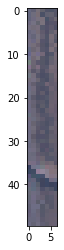

In [154]:
plt.imshow(disp_road[5000:5050])
plt.show()
# plt.imshow(disp_road[8000:8001])
# plt.show()

In [121]:
disp_road.shape

(9856, 7, 3)

In [45]:
for i in range(disp_road.shape[1]):
  print(np.mean(insert_pixs_img[insert_pixs_img != np.nan][:, i, 0]))

IndexError: ignored

In [46]:
insert_pixs_img[insert_pixs_img != np.nan].shape

(206568,)

In [42]:
insert_pixs_img[:, 0, 0]

array([3613., 3433., 3402., ...,   nan,   nan,   nan])

In [36]:
road_temp[1000:1050]

array([[[ 727865., 4352765.],
        [ 727855., 4352745.],
        [ 727845., 4352795.],
        [ 727855., 4352735.],
        [ 727855., 4352755.],
        [ 727855., 4352785.],
        [ 727855., 4352775.],
        [ 727865., 4352775.]],

       [[ 727875., 4352765.],
        [ 727865., 4352745.],
        [ 727855., 4352795.],
        [ 727865., 4352735.],
        [ 727865., 4352755.],
        [ 727865., 4352785.],
        [ 727875., 4352775.],
        [ 727875., 4352785.]],

       [[ 727885., 4352765.],
        [ 727875., 4352745.],
        [ 727865., 4352795.],
        [ 727875., 4352735.],
        [ 727875., 4352755.],
        [ 727875., 4352795.],
        [ 727885., 4352775.],
        [ 727885., 4352785.]],

       [[ 727895., 4352765.],
        [ 727885., 4352745.],
        [ 727885., 4352795.],
        [ 727885., 4352735.],
        [ 727885., 4352755.],
        [ 727895., 4352795.],
        [ 727895., 4352775.],
        [ 727895., 4352785.]],

       [[ 727905., 4352765.],
  

In [34]:
insert_pixs_img[1000:1050]

array([[[1954., 1813., 1998.],
        [2071., 1868., 2031.],
        [2210., 1958., 2076.],
        ...,
        [1937., 1715., 1845.],
        [1970., 1793., 1896.],
        [2052., 1857., 2002.]],

       [[2017., 1848., 2026.],
        [2057., 1890., 2047.],
        [2173., 1999., 2051.],
        ...,
        [1900., 1690., 1859.],
        [2131., 1870., 2004.],
        [1873., 1715., 1887.]],

       [[2049., 1870., 2068.],
        [2360., 2080., 2226.],
        [2183., 1954., 2051.],
        ...,
        [2160., 1861., 1933.],
        [2069., 1825., 1964.],
        [1910., 1763., 1907.]],

       ...,

       [[2167., 1997., 2156.],
        [4064., 3921., 3959.],
        [4044., 3616., 3606.],
        ...,
        [3158., 2824., 3041.],
        [2166., 1890., 1938.],
        [3169., 2981., 3234.]],

       [[2102., 1865., 1973.],
        [3821., 3889., 4052.],
        [3825., 3436., 3209.],
        ...,
        [3420., 2880., 3061.],
        [2075., 1769., 1836.],
        [3180.,

In [33]:
disp_road[1000:1050]

array([[[166, 154, 169],
        [176, 158, 172],
        [187, 166, 176],
        ...,
        [164, 145, 156],
        [167, 152, 161],
        [174, 157, 170]],

       [[171, 157, 172],
        [174, 160, 173],
        [184, 169, 174],
        ...,
        [161, 143, 158],
        [181, 158, 170],
        [159, 145, 160]],

       [[174, 158, 175],
        [200, 176, 189],
        [185, 166, 174],
        ...,
        [183, 158, 164],
        [175, 155, 166],
        [162, 149, 162]],

       ...,

       [[184, 169, 183],
        [345, 333, 336],
        [343, 307, 306],
        ...,
        [268, 240, 258],
        [184, 160, 164],
        [269, 253, 274]],

       [[178, 158, 167],
        [324, 330, 344],
        [325, 292, 272],
        ...,
        [290, 244, 260],
        [176, 150, 156],
        [270, 262, 272]],

       [[177, 160, 168],
        [333, 324, 321],
        [295, 279, 289],
        ...,
        [281, 238, 255],
        [171, 147, 161],
        [294, 274, 284]]

In [ ]:
x[7000:7050]

In [ ]:
??x = np.loadtxt("/content/drive/MyDrive/Winter_Research/Rois/Roi_1/spine_cloud/2016-04-05.csv")

In [ ]:
x = x.reshape((7701, 9, 3))

In [ ]:
from PIL import Image
import numpy as np

# data = np.random.random((100,100))

# #Rescale to 0-255 and convert to uint8
# rescaled = (255.0 / data.max() * (data - data.min())).astype(np.uint8)

im = Image.fromarray(disp_road)
# im.save('test.png')

TypeError: ignored

In [ ]:
disp_road[0][0]

array([118, 106, 103])

In [ ]:
rescaled = (255.0 / compress_back.max() * (compress_back - compress_back.min())).astype(np.uint8)

In [ ]:
#new_img_rgb = (255*((new_sorted_img - 100)/3500)).astype('uint8')
# for i in range(compress_3000.shape[0]):
#   print(i)  
#   new_img = compress_3000[i]
#   print(new_img.shape)
#   print(np.max(np.mean(new_img, axis=2)))
#   disp = new_img[1000:1050]
#   rescaled = (255*disp).astype(np.uint8)
#   plt.imshow(rescaled)
  
#   im = Image.fromarray(rescaled)
#   im.save('CA_straight/cali_img' + str(i) + '.png')
#   plt.show()

In [ ]:
new_img_rgb

In [ ]:
def fit_and_splice(lon, lat):  
  new_x = np.array(lon).reshape(-1,1)
  new_y = np.array(lat)
  fit = LinearRegression().fit(new_x, new_y)
  score = fit.score(new_x, new_y)
  # plt.xlabel("Longitude Coord")
  # plt.ylabel("LatitudeCoord")
  # plt.scatter(new_x, new_y)
  # axes = plt.gca()
  # x_vals = np.array(axes.get_xlim())
  # y_vals = fit.intercept_ + fit.coef_ * x_vals
  predictions = fit.predict(new_x)
  splices = [x / row_num for x in range(row_num + 1)]
  buckets = scipy.stats.mstats.mquantiles(predictions, prob=splices)
  y_cent = [(buckets[i] + buckets[i + 1]) / 2 for i in range(len(buckets) - 1)]
  x_cent = (y_cent - fit.intercept_) / fit.coef_
  return x_cent, y_cent, fit
  # print(score)
  # plt.plot(x_vals, y_vals, '--')
  # plt.savefig("Road_Fit.png")
  # plt.show()

In [ ]:
def splice(pic, coords, x_cent, y_cent, pix_width):  
  new_img = np.zeros((x_cent.shape[0], pix_width , 2))
  centers = zip(x_cent, y_cent)
  temp_coords = coords.copy()
  for i in range(pix_width):
    x_plot = []
    y_plot = []  
    for j, (x, y) in enumerate(zip(x_cent, y_cent)):
      cent = np.array((x, y))
      dist = np.linalg.norm(temp_coords - cent, axis=1)
      index = dist.argmin()
      if (i == (pix_width - 1)) and dist[index] > 100:
        new_img[j][i][:] = [-1, -1]
        continue
      new_img[j][i][:] = pic[index][3:]
      temp_coords[index] = [0, 0]
      if temp_coords[index][0] != 0 and temp_coords[index][1] != 0:
        print(index, temp_coords[index])
  return new_img

In [ ]:
def sort_arr(new_img, x_cent, y_cent):  
  new_sorted_img = np.zeros((new_img.shape[0], new_img.shape[1], 2))
  score = 0
  scores = []
  for i in range(new_img.shape[0]):
    row = new_img[i]
    new_row = np.zeros((pix_width, 2))
    center = np.array([x_cent[i], y_cent[i]])
    # print(center)
    # break
    lat_lon = np.hstack([row[:,0][:, np.newaxis], row[:,1][:, np.newaxis]]) 
    dist = np.linalg.norm(row - center, axis=1)
    # print("dist:", dist)
    # print("center:", center)
    # print("row:", row)
    score += np.sum(dist)
    scores.append(np.sum(dist))
    signs = []
    for c in range(row.shape[0]):
      if row[c][0] == center[0] and row[c][1] == center[1]:
        signs.append(0)
        continue
      if row[c][0] == center[0]:
        if row[c][0] > center[0]:
          signs.append(1)
          continue
        else:
          signs.append(-1)
          continue
      if row[c][1] == center[1]:
        if row[c][0] < center[0]:
          signs.append(1)
          continue
        else:
          signs.append(-1) 
          continue
      m = (row[c][1] - center[1]) / (row[c][0] - center[0])
      b = center[1] - m * center[0]
      ortho_m = -1 / m
      ortho_b = center[1] - ortho_m * center[0]
      signs.append(np.sign(row[c][0] - ortho_m * row[c][1] + ortho_b))
    #print(dist.shape, preds.shape)
    rankings = np.multiply(dist, np.array(signs))
    indicies = rankings.argsort()
    new_sorted_img[i] = row[indicies]
  # print(score)
  # print(len(scores))
  print("scores:", np.sum(scores))
  return new_sorted_img, scores

In [ ]:
np.sum(scores)

NameError: ignored